#Name: Aniket Chattopadhyay
#Batch: NOV BATCH A14
#Field: DATA SCIENCE

##Task : Iris Flower Classification (Task 3)

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements.

> Now, we have the measurements of Iris flowers categorized by their respective species.

> Our objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into
their respective species.



# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Iris_flower_classifcation_dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
cor=df.corr()
cor

<ipython-input-9-7a446f931109>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

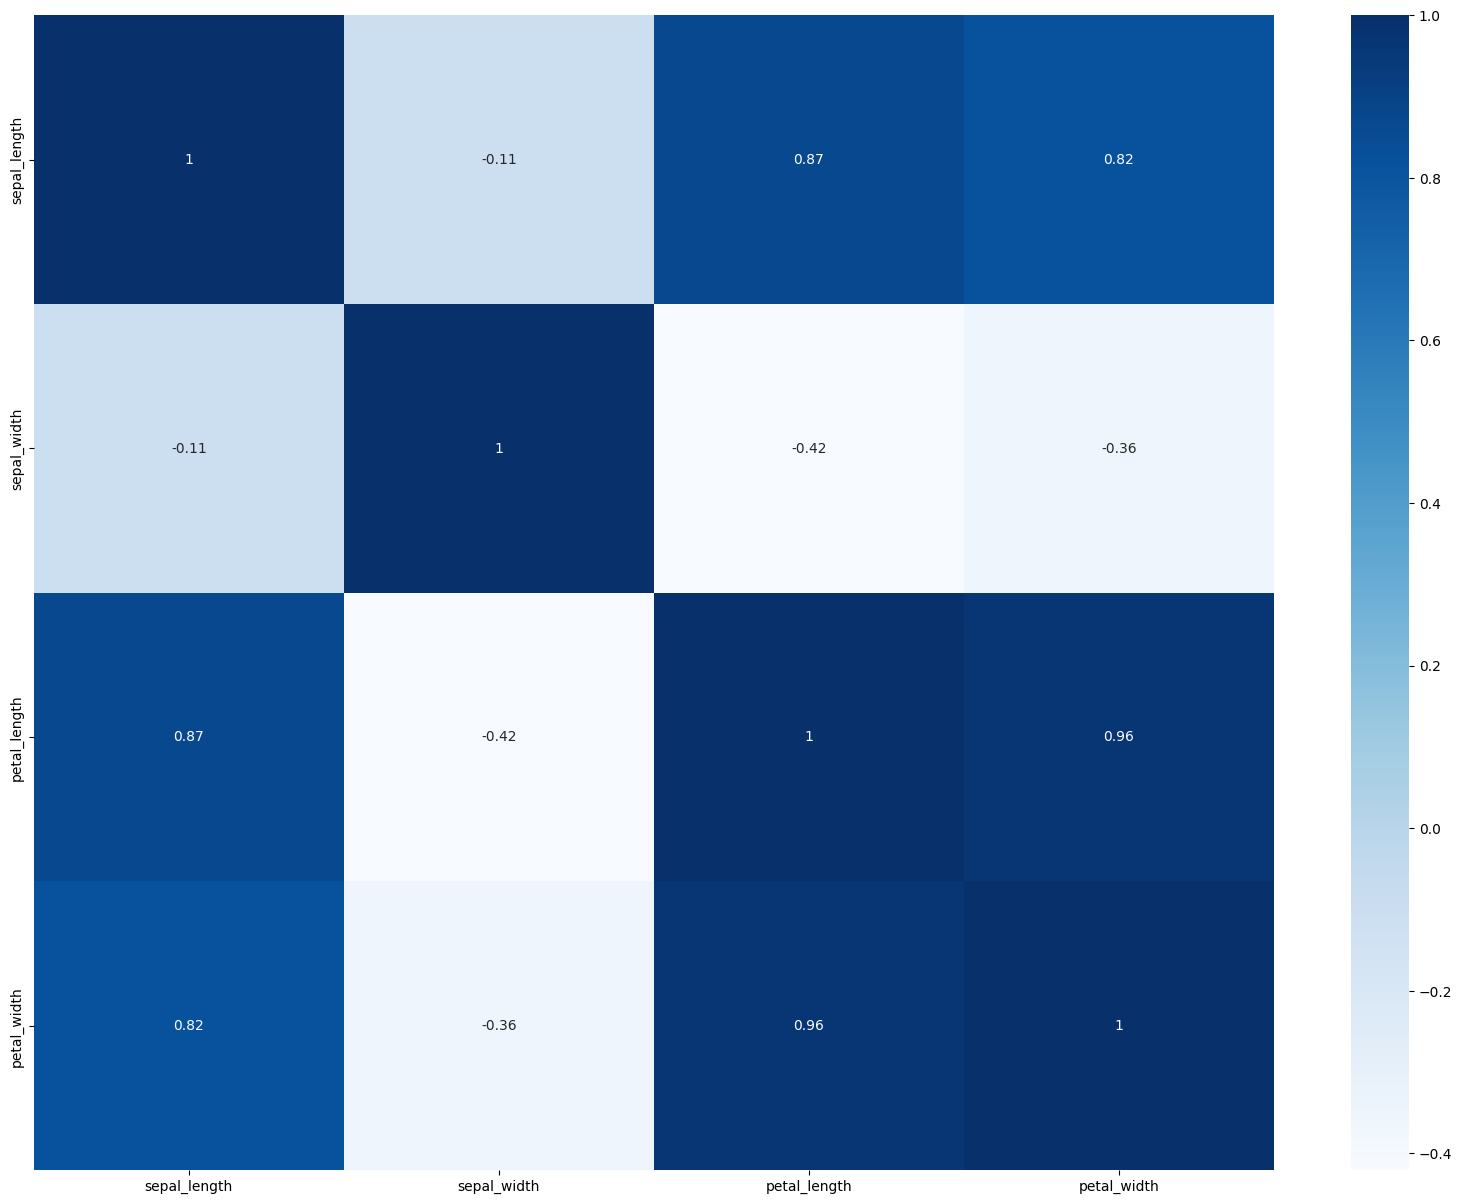

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(cor,annot=True,cmap="Blues")

In [15]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

<Axes: xlabel='species', ylabel='count'>

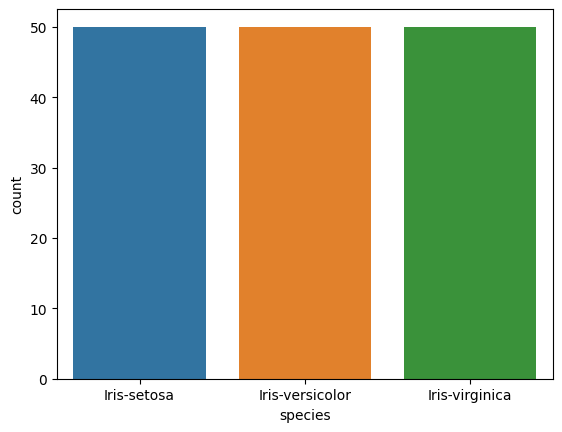

In [20]:
sns.countplot(x="species",data=df)

# Splitting of data into training and testing data



In [23]:
x=df.iloc[:,0:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['species'] = lb_make.fit_transform(df['species'])
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,1
112,6.8,3.0,5.5,2.1,2
133,6.3,2.8,5.1,1.5,2


In [60]:
y=df.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [62]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
143,6.8,3.2,5.9,2.3
60,5.0,2.0,3.5,1.0
39,5.1,3.4,1.5,0.2
4,5.0,3.6,1.4,0.2
147,6.5,3.0,5.2,2.0
...,...,...,...,...
90,5.5,2.6,4.4,1.2
26,5.0,3.4,1.6,0.4
117,7.7,3.8,6.7,2.2
45,4.8,3.0,1.4,0.3


In [63]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
71,6.1,2.8,4.0,1.3
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
108,6.7,2.5,5.8,1.8
81,5.5,2.4,3.7,1.0
10,5.4,3.7,1.5,0.2
130,7.4,2.8,6.1,1.9
145,6.7,3.0,5.2,2.3
62,6.0,2.2,4.0,1.0


#Creating model

In [64]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 1, 0, 1, 0, 2, 1])

In [66]:
y_test

92     1
71     1
51     1
23     0
108    2
81     1
10     0
130    2
145    2
62     1
69     1
124    2
22     0
33     0
139    2
123    2
68     1
100    2
57     1
121    2
15     0
141    2
112    2
74     1
85     1
20     0
97     1
38     0
115    2
72     1
Name: species, dtype: int64

In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#Model conclusions

In [69]:
model.predict([[4.9,3.0,1.4,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [70]:
model.predict([[6.3,2.5,5.0,1.9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [71]:
from sklearn.metrics import accuracy_score,classification_report

In [72]:
accuracy_score(y_test,y_pred)

1.0

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

